In [66]:
import numpy as np
import pandas as pd

In [67]:
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora

In [68]:
data = pd.read_csv('video_data.csv')

In [69]:
data.head(5)

,video_id,category_name,short_description,story_text,title
0,5653616771001,Entertainment News,The 34-year-old actor is not sure if he's goin...,Hack: \tThe 34-year-old actor is not sure if h...,Adam Driver still 'undecided' on seeing 'Star ...
1,5631919940001,Entertainment News,The poster gives us a closer look at the actor...,The latest poster of 2.0 featuring Bollywood s...,"BEWARE: Akshay Kumar's look from 2.0 is out, a..."
2,5767901401001,India News,A massive outrage has erupted over the horrifi...,A massive outrage has erupted over the horrifi...,Kathua-Rape-Murder Case: Protesters demand CBI...
3,5741125480001,India News,"According to forensic report, traces of alcoho...",The mystery surrounding Sridevi’s passing away...,Sridevi’s death: Here’s what Amar Singh claims...
4,5746648010001,Entertainment News,After her national award winning first film 'N...,After her national award winning first film 'N...,Churni's next film on social media affecting p...


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

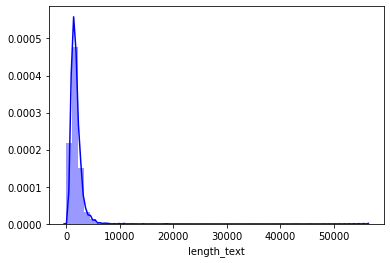

In [95]:
data['length_text'] = data['story_text'].str.len()
sns.distplot(data['length_text'], color="b")
plt.show()

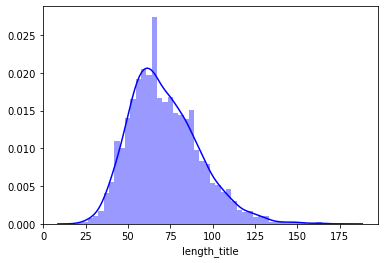

In [96]:
data['length_title'] = data['title'].str.len()
sns.distplot(data['length_title'], color="b")
plt.show()

In [73]:
titles = [x for x in data['title']]
docs = [x for x in data['story_text']]

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Data Preprocessing

In [76]:
# A function to prepare the text for topic modelling
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [77]:
import re
import string

In [78]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [79]:
nltk.download('wordnet')
docs = [words(x) for x in data['story_text']]

[nltk_data] Downloading package wordnet to /Users/ravissa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
from gensim.corpora import Dictionary

In [81]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 78180
Number of unique words after removing rare and common words: 8588


In [82]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))

Word 3 ("always") appears 1 time.
Word 8 ("back") appears 1 time.
Word 12 ("come") appears 1 time.
Word 40 ("hit") appears 1 time.
Word 43 ("interview") appears 1 time.
Word 91 ("tv") appears 1 time.
Word 151 ("accused") appears 1 time.
Word 194 ("congress") appears 5 time.
Word 197 ("country") appears 2 time.
Word 235 ("group") appears 1 time.
Word 303 ("party") appears 1 time.
Word 309 ("political") appears 1 time.
Word 381 ("tuesday") appears 1 time.
Word 430 ("exclusively") appears 1 time.
Word 437 ("full") appears 1 time.
Word 465 ("republic") appears 1 time.
Word 473 ("speaking") appears 1 time.
Word 488 ("added") appears 1 time.
Word 510 ("earlier") appears 1 time.
Word 652 ("pm") appears 3 time.
Word 696 ("prime") appears 1 time.
Word 764 ("gandhi") appears 1 time.
Word 784 ("rahul") appears 1 time.
Word 923 ("saying") appears 1 time.
Word 928 ("top") appears 1 time.
Word 988 ("shankar") appears 1 time.
Word 1123 ("modi") appears 4 time.
Word 1340 (" here") appears 1 time.
Word

### Topic Modeling using LDA

In [83]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [84]:
from gensim.models import ldamodel
import gensim.corpora

In [85]:
from gensim.models import LdaModel

In [86]:
get_lda_topics(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,653,808,2260,1406,199,469,194,904,350,366
1,140,812,308,197,180,109,303,1283,540,608
2,780,819,251,147,608,81,174,446,1083,1655
3,904,3234,985,801,712,70,1461,474,1051,1650
4,840,809,555,126,719,77,184,432,959,1734
5,72,3253,2063,3626,151,130,271,416,853,1640
6,652,806,3447,488,182,57,234,1636,989,1291
7,844,3276,4799,557,234,30,357,106,69,987
8,778,811,1366,3654,465,527,696,1187,660,1746
9,77,3232,759,3877,258,387,1123,426,2066,1190


In [87]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [88]:
from gensim import models,corpora

In [89]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.032*"653" + 0.032*"140" + 0.017*"780" + 0.012*"904" + 0.010*"840" + 0.010*"72"')
(1, '0.066*"808" + 0.049*"812" + 0.037*"819" + 0.037*"3234" + 0.030*"809" + 0.027*"3253"')
(2, '0.012*"2260" + 0.008*"308" + 0.006*"251" + 0.005*"985" + 0.005*"555" + 0.005*"2063"')
(3, '0.011*"1406" + 0.009*"197" + 0.006*"147" + 0.005*"801" + 0.004*"126" + 0.004*"3626"')
(4, '0.023*"199" + 0.020*"180" + 0.010*"608" + 0.009*"712" + 0.008*"719" + 0.007*"151"')
(5, '0.007*"469" + 0.006*"109" + 0.006*"81" + 0.006*"70" + 0.006*"77" + 0.006*"130"')
(6, '0.015*"194" + 0.014*"303" + 0.013*"174" + 0.012*"1461" + 0.011*"184" + 0.011*"271"')
(7, '0.024*"904" + 0.021*"1283" + 0.016*"446" + 0.016*"474" + 0.010*"432" + 0.009*"416"')
(8, '0.016*"350" + 0.012*"540" + 0.011*"1083" + 0.010*"1051" + 0.010*"959" + 0.009*"853"')
(9, '0.018*"366" + 0.017*"608" + 0.017*"1655" + 0.016*"1650" + 0.016*"1734" + 0.012*"1640"')


### COSINE similarity

In [90]:
from itertools import chain

In [91]:
words_list=list(chain.from_iterable(docs))

In [92]:
# Cosine similarity
def cosine_sim(text1, text2):
    tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
    return ((tfidf_score * tfidf_score.T).A)[0, 1]

# Most similar article
def closest_doc_name(sentence, docs):
    cos = []
    for i in range(len(docs)):
        cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
    return [titles[x] for x in np.argsort(cos)[-10:][::-1]]

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=words, stop_words=stop_words).fit(words_list)

In [94]:
closest_doc_name('news', docs)

['News Wrap: All the top headlines from across the world',
 'Prime Minister directs withdrawal of fake news notice; onus put on Press Council of India',
 "National Wrap: All That's Trending In The Country",
 "National Wrap: All That's Trending In India",
 'National Wrap: Latest Trending News In India On March 9',
 'National Wrap: Latest Trending News In India On March 10',
 'National Wrap: Latest Trending News In India On March 6',
 'National Wrap: Latest Trending News In India On March 7',
 'National Wrap: Latest Trending News In India On March 5',
 'LIVE NOW: Republic World App - Light On Your Phone; Heavy On The News!']